<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="#E74C3C" size="7" style="font-family:Arial, sans-serif;">
        Kernels, Filters, and Convolution <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Computer Vision <br>
    </font>
  
</div>


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #1<br>
    </font>
</div>


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        1D Convolution
    </font>
</h1>


1D convolution is a powerful technique widely used in machine learning, particularly in the analysis of sequential data like time-series signals, speech, and even stock prices. At its core, 1D convolution works by sliding a filter or kernel over a sequence of data points to detect patterns, extract features, or smooth the data. Unlike 2D convolution, which operates on grids (such as images), 1D convolution works on one-dimensional sequences, making it well-suited for problems where data is ordered in time or space.

<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 1D Convolution Works
    </font>
</h2>


The basic idea of 1D convolution involves applying a kernel to a sequence of values. The kernel slides over the input sequence, performing element-wise multiplications followed by a sum. This produces a new sequence that highlights certain features based on the kernel used. For example, in time-series analysis, different kernels can detect trends, seasonal patterns, or sharp changes in the data.


The result of 1D convolution is a feature map, which is another sequence that represents important aspects of the input sequence. Depending on the choice of kernel, stride (the step size at which the kernel moves), and padding (how edges of the sequence are handled), 1D convolution can either downsample or retain the size of the original sequence.

There are various approaches to implementing 1D convolution, each with its own trade-offs in terms of computational efficiency and feature extraction. These approaches can be adapted to suit specific tasks and data characteristics.


For understanding the mathematics behind 1D convolution, We recommend watching this <a href="https://www.youtube.com/watch?v=KuXjwB4LzSA&t=443s" target="_blank" style="color:#007acc;">YouTube video</a>.


In [53]:
import numpy as np

def convolve_1d_two_loops(signal, kernel):
    """
    Convolve a 1D signal with a kernel using two loops.
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result.
    """
    signal_length = len(signal)
    kernel_length = len(kernel)
    
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length)
    
    kernelf = kernel[::-1]
    
    for i in range(output_length):
        sum_val = 0
        for j in range(kernel_length):
               if 0 <= i - j < signal_length:
                sum_val += signal[i - j] * kernelf[kernel_length - j - 1]
        output[i] = sum_val

    return output.astype(np.int32)

In [150]:
import numpy as np

def convolve_1d_one_loops(signal, kernel):
    signal_len = len(signal)
    kernel_len = len(kernel)
    
    output_len = signal_len + kernel_len - 1
    output = np.zeros(output_len, dtype=np.int32)
    
    for i in range(output_len):
        start_idx = max(i - kernel_len + 1, 0)
        end_idx = i + 1
        kernel_segment = kernel[kernel_len - (end_idx - start_idx):]
        signal_segment = signal[start_idx:end_idx]
        
        if len(signal_segment) != len(kernel_segment):
            kernel_segment = kernel_segment[:len(signal_segment)]
        
        output[i] = np.sum(signal_segment * kernel_segment)
    
    return output




In [151]:
import numpy as np

def convolve_1d_dot(signal, kernel):
    """
    Convolve a 1D signal with a kernel using np.dot (fast and vectorized).
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns: 
        output: 1D array representing the convolution result.
    """
    kernel = kernel[::-1]
    
    signal_length = len(signal)
    kernel_length = len(kernel)
    
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length)
    
    for i in range(1 - kernel_length ,signal_length):
    
       output[i + 2] = np.dot(
            signal[max(0, i):min(i + len(kernel), len(signal))],
            kernel[max(-i, 0):len(signal) - i * (len(signal) - len(kernel) < i)],
        )

    return output.astype(np.int32)


In [152]:
import numpy as np

def fft_convolve_vectorized(signal, kernel):
    """
    Convolve a 1D signal with a kernel using Fast Fourier Transform (FFT).
    Args:
        signal: 1D array representing the input signal.
        kernel: 1D array representing the filter to apply to the signal.
    Returns:
        output: 1D array representing the convolution result using FFT.
    """
    signal_length = len(signal)
    kernel_length = len(kernel)
    
    
    output_length = signal_length + kernel_length - 1
    
    signal = np.append(signal, np.zeros(output_length - signal_length))
    kernel = np.append(kernel, np.zeros(output_length - kernel_length))
    
    signal_fft = np.fft.fft(signal)
    kernel_fft = np.fft.fft(kernel)
    
    output_fft = signal_fft * kernel_fft 
    output = np.fft.ifft(output_fft)
    
    return np.round(np.real(output)).astype(np.int32)

In [153]:
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([1, 0, -1])

signal_len = len(signal)
kernel_len = len(kernel)

print("Sanity Check: Comparing Results")
print("Two loops:", convolve_1d_two_loops(signal, kernel))
print("One loop:", convolve_1d_one_loops(signal, kernel))
print("Dot product:", convolve_1d_dot(signal, kernel))
print("FFT vectorized:", fft_convolve_vectorized(signal, kernel))
print("numpy function:", np.convolve(signal, kernel))#[int(np.ceil(kernel_len / 2)) - 1: int(np.ceil(kernel_len / 2)) + signal_len - 1])

Sanity Check: Comparing Results
Two loops: [ 1  2  2  2  2 -4 -5]
One loop: [-1 -2 -2 -2 -2  4  5]
Dot product: [ 1  2  2  2  2 -4 -5]
FFT vectorized: [ 1  2  2  2  2 -4 -5]
numpy function: [ 1  2  2  2  2 -4 -5]


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>


In this section, we will explore the features that different kernels are designed to extract. For each kernel provided, identify what type of feature or pattern the kernel is trying to detect in a sequence.

#### **1. Kernel: `[1, -1]`**

**Answer:**
It is a differencing kernel that computes the difference between consecutive elements in a sequence.
As we can see below, it is quite evident that each element has decreased from its previous one.(The first and last elements, due to the incomplete convolution of the entire signal, retain the initial and final values.)

In [154]:
Kernel_Q1 = [1 , -1]
Signal = np.array([0, 2, 5, 9, 14])
Answer1 = np.convolve(Signal, Kernel_Q1)
Answer1

array([  0,   2,   3,   4,   5, -14])

#### **2. Kernel: `[1, 1, 1]`**

**Answer:**
when convolving with this kernel, you're just summing the overlapping values. It means its calculate sum of the signal's element. The number of the element for sum is equal to the kernel size.

In [155]:
Kernel_Q2 = [1, 1, 1]
Signal = np.array([0, 2, 5, 9, 14])
Answer2 = np.convolve(Signal, Kernel_Q2)
Answer2

array([ 0,  2,  7, 16, 28, 23, 14])

#### **3. Kernel: `[0.25, 0.25, 0.25, 0.25]`**

**Answer:**
This kernel is used for smoothing or averaging over a window of four consecutive elements in the signal. It represents a uniform filter with equal weights.A complete response occurs when the entire signal is convolved with the kernel, meaning that an element from the signal is selected based on the kernel length. For example, 4 and 7.5 are complete responses for this convolution.

In [156]:
Kernel_Q3 = [0.25, 0.25, 0.25, 0.25]
Signal = np.array([0, 2, 5, 9, 14])
Answer3 = np.convolve(Signal, Kernel_Q3)
Answer3

array([0.  , 0.5 , 1.75, 4.  , 7.5 , 7.  , 5.75, 3.5 ])

#### **4. Kernel: `[-1, 2, -1]`**

**Answer:**
Its for detecting edges or changes in a 1D signal by approximating the second derivative, and it is sensitive to rapid variations in the signal's values. For example we can see when convolution reach the '100', there is a rapid chnage in the answer.

In [157]:
Kernel_Q4 = [-1, 2, -1]
Signal = np.array([0, 2, 100, 9, 14])
Answer4 = np.convolve(Signal, Kernel_Q4)
Answer4

array([  0,  -2, -96, 189, -96,  19, -14])

#### **5. Kernel: `[1, 0, -1]`**

**Answer:**
It computes the difference between adjacent values in the signal. It assigns a weight of +1 to the left neighbor, 0 to the current value, and -1 to the right neighbor. When convolving a signal with this kernel, it measures the difference between the current value and the neighboring values (to the left and right). The result indicates whether there is a change or edge at that point.

In [62]:
Kernel_Q5 = [1, 0, -1]
Signal = np.array([0, 2, 100, 9, 14])
Answer5 = np.convolve(Signal, Kernel_Q5)
Answer5

array([  0,   2, 100,   7, -86,  -9, -14])

In [63]:
    """
    Measure the average execution time of different convolution methods over a number of iterations.
    Args:
        signal_len: Length of the random input signal.
        kernel_len: Length of the random kernel.
        iterations: Number of times each method should be run to average the time.
    Returns:
        Tuple of average times for each method.
    """

import numpy as np
from time import sleep, time

def benchmark_convolution(signal_len, kernel_len, iterations):
    
        np.random.seed(42) 
        random_signal = np.random.rand(signal_len)
        random_kernel = np.random.rand(kernel_len)
    
    
    
        start1 = time()
        for i in range (iterations):
            convolve_1d_two_loops(random_signal, random_kernel)
        end1 = time()        
        t1 = (end1 - start1)/iterations
    
        start2 = time()
        for i in range (iterations):
                convolve_1d_dot(random_signal, random_kernel)
        end2 = time()        
        t2 = (end2 - start2)/iterations
    
        start3 = time()
        for i in range (iterations):
                fft_convolve_vectorized(random_signal, random_kernel)
        end3 = time()        
        t3 = (end3 - start3)/iterations
    
        start4 = time()
        for i in range (iterations):
                 np.convolve(random_signal, random_kernel)
        end4 = time()        
        t4 = (end4 - start4)/iterations
    

        avg_times = [t1, t2, t3, t4]
    
        return avg_times
num_iterations = 1000

signal_len = 500
kernel_len = 20
avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[1]}")
print(f"FFT vectorized: {avg_times[2]}")
print(f"NumPy convolve: {avg_times[3]}")


Average times over 1000 iterations (in seconds):
Two loops: 0.005964974164962769
Dot product: 0.002187274217605591
FFT vectorized: 0.0002479252815246582
NumPy convolve: 1.7000198364257813e-05


<h2 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        Assignment Questions
    </font>
</h2>

#### **1. Performance Comparison of Convolution Methods**

After running the convolution methods, compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm used by each method.

**Answer:**
NumPy's convolution is the fastest. This method uses highly optimized C code under the hood(Based on the search). This is why it's significantly faster than Python-based implementations.

Two loops convolution is the slowest. Its the most basic and inefficient approach, requiring two nested loops in Python. Python's loops have significant overhead compared to more efficient vectorized or optimized methods.

---

#### **2. FFT Convolution Time Complexity**

You may have noticed that the FFT-based convolution is much faster than the others for longer signals. Can you describe the time complexity of the FFT convolution? Why is this method more efficient for larger input sizes?

**Answer:**
This can be attributed to its time complexity and the mathematical properties of the Fast Fourier Transform (FFT).The time complexity of FFT convolution is O(n log n), where n is the size of the signal. Its even more fater than direct Fourier transform. As you scale up the signal size (increasing n to 1 million), the FFT-based convolution still remains much more efficient than direct convolution, which would grow to O(n * m) (1 million * 100 = 100 million operations). 

---

#### **3. Scaling with Signal Length and Kernel Length**

Try changing the values of `signal_len` and `kernel_len` (e.g., doubling both lengths). Is the relative performance of the methods (speed comparison) the same as before? Which methods are most affected by changes in the size of the signal or kernel?

**Answer:**
In practice, for small signals or simple tasks, methods like Dot Product or Two Loops may suffice, but as the size of the signal and kernel grows, FFT-based convolution or NumPy’s convolution will become the preferred methods due to their significantly better scaling performance. You can see the answer below.


In [64]:
num_iterations = 1000
signal_len = 1000
kernel_len = 40

avg_times = benchmark_convolution(signal_len, kernel_len, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Two loops: {avg_times[0]}")
#print(f"One loop: {avg_times[1]}")
print(f"Dot product: {avg_times[1]}")
print(f"FFT vectorized: {avg_times[2]}")
print(f"NumPy convolve: {avg_times[3]}")


Average times over 1000 iterations (in seconds):
Two loops: 0.02232446503639221
Dot product: 0.005005075931549073
FFT vectorized: 0.0005201528072357178
NumPy convolve: 6.14330768585205e-05


#### **4. Optimal Use Case for FFT Convolution**

Based on the results of your experiments, when would it be best to use the FFT-based convolution versus one of the other methods? Consider factors like signal length, kernel length, and computational resources.

**Answer:**
FFT-based convolution is most efficient for long signals and large kernels due to its **O(n log n)** time complexity, which offers substantial performance gains over methods like Two Loops (**O(n * m)**) or Dot Product (**O(n)**). As the size of the signal or kernel grows, FFT becomes more advantageous, particularly when there are sufficient computational resources to manage the extra overhead of transforming the signal and kernel to the frequency domain. For smaller signals and kernels, simpler methods like Dot Product or NumPy's built-in convolution may be faster, as the additional computational cost of FFT may not provide significant benefits.

---

#### **5. NumPy Convolve vs Custom Implementations**

Compare the performance of the built-in `np.convolve` with your custom implementations (like the dot-product or one-loop versions). Why do you think the `np.convolve` function performs as it does? Could it be internally optimized, and if so, how?

**Answer:**
The np.convolve function generally outperforms custom implementations like the dot-product or one-loop versions, especially for larger signal lengths. This is likely because np.convolve is highly optimized at a lower level, leveraging efficient algorithms and optimized C code within the NumPy library. It could employ optimized algorithms such as overlap-add or overlap-save for specific types of signals or kernels. These methods minimize redundant calculations and improve efficiency. Furthermore, np.convolve is typically written in C and uses highly optimized memory management, such as stride-based operations and parallelism, which custom Python implementations may not exploit to the same extent.


---

#### **6. Interpretation of Results for Small Signal and Kernel Sizes**

For smaller values of `signal_len` and `kernel_len`, you might see different performance trends. Can you explain why the FFT method might not always be the best choice when working with smaller inputs?

**Answer:**
For small signals, the constant factors involved in performing the FFT and then transforming the result back to the time domain may outweigh the benefits of the O(n log n) complexity. The overhead associated with preparing the data for the FFT, including zero-padding (to optimize the FFT) and performing inverse transforms, can be significant relative to the size of the data.For smaller signals and kernels, one loop, two loops or dot product are often simpler and faster, as the cost of iterating over the signal is relatively low compared to the preparation and processing steps involved in FFT.


<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        2D Convolution
    </font>
</h1>

2D convolution is a critical technique in image processing and other tasks where data is represented in two dimensions, such as images. In 2D convolution, a kernel (or filter) slides over a 2D input matrix to produce a feature map. This technique is used for tasks like edge detection, blurring, and pattern recognition in images.

<h1 style="line-height:200%; font-family: Arial, sans-serif; color: #007acc; text-align: left;">
    <font face="Arial" color="#007acc">
        How 2D Convolution Works
    </font>
</h1>

The process of 2D convolution involves applying a kernel to an input matrix by sliding the kernel over the matrix and performing element-wise multiplication followed by a sum. This operation results in a new matrix that highlights features based on the kernel used.


For understanding the mathematics behind 2D convolution, We recommend watching [YouTube video](https://www.youtube.com/watch?v=O2CBKXr_Tuc).

In [65]:
"""
Perform 2D convolution using four nested loops.
Args:
image (numpy.ndarray): 2D array representing the input image.
kernel (numpy.ndarray): 2D array representing the filter to apply to the image.
stride (int): The stride of the convolution.
pad (int): The amount of zero-padding added to the image.
Returns:
numpy.ndarray: 2D array representing the convolution result.
"""


import numpy as np

def convolve_2d_four_loops(image, kernel, stride=1, pad=0):
    
        (H_image, W_image) = image.shape
        (H_kernel, W_kernel) = kernel.shape
    
        if pad > 0:
            image_padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
        else:
            image_padded = image

        out_height = ((H_image - H_kernel + 2 * pad) // stride) + 1
        out_width = ((W_image - W_kernel + 2 * pad) // stride) + 1
        output = np.zeros((out_height, out_width))

        for y in range(out_height):
            for x in range(out_width):
                y_start = y * stride
                x_start = x * stride

                conv_sum = 0
                for ky in range(H_kernel):
                    for kx in range(W_kernel):
                        conv_sum += image_padded[y_start + ky, x_start + kx] * kernel[ky, kx]
                output[y, x] = conv_sum

        return output

In [66]:
'''
numpy Pad example from numpy
#import numpy as np
#a = [1, 2, 3, 4, 5]
#np.pad(a, (1), 'constant', constant_values=0)
'''

"\nnumpy Pad example from numpy\n#import numpy as np\n#a = [1, 2, 3, 4, 5]\n#np.pad(a, (1), 'constant', constant_values=0)\n"

In [67]:
"""
Convolve a 2D image with a kernel using two loops.
Args:
image: 2D array representing the input image.
kernel: 2D array representing the filter to apply to the image.
Returns:
output: 2D array representing the convolution result.
"""
import numpy as np

def convolve_2d_two_loops(image, kernel, stride=1, pad=0):

    (iH, iW) = image.shape
    (kH, kW) = kernel.shape

    if pad > 0:
        image_padded = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    else:
        image_padded = image

    out_height = (iH - kH + 2 * pad) // stride + 1
    out_width = (iW - kW + 2 * pad) // stride + 1
    output = np.zeros((out_height, out_width))

    for y in range(out_height):
        for x in range(out_width):
            y_start = y * stride
            x_start = x * stride
            region = image_padded[y_start:y_start + kH, x_start:x_start + kW]
            
            output[y, x] = np.sum(region * kernel)

    return output



### Convolution Using im2col

The `im2col` method is a powerful technique used to convert convolution operations into matrix multiplications. This technique simplifies and speeds up convolution computations, which are fundamental in many image processing and deep learning tasks.

#### im2col Transformation:
The `im2col` technique involves extracting overlapping patches from the padded image, each corresponding to a position of the kernel. These patches are then flattened into column vectors.

### Multiplication
Once the image patches are transformed into the im2col matrix, convolution can be performed using matrix multiplication. Flatten the kernel matrix into a vector `k_vec`. The convolution result can then be obtained by multiplying the im2col matrix by `k_vec`.

<img src="https://www.researchgate.net/publication/364684841/figure/fig7/AS:11431281091934216@1666661734455/An-example-of-the-Im2col-convolution-optimization-algorithm-In-terms-of-FPGA-based.png" alt="Steve Jobs" style="width: 750px; height: auto;">


For an image matrix of size `H x W` and a kernel of size `kH x kW` with stride `S`, we can ask:

- **Question 1:**
  What will be the number of columns in the output matrix from the im2col transformation?

  **Answer:**
The number of columns in the im2col matrix is the total number of positions the kernel can slide over the image, which is calculated as:


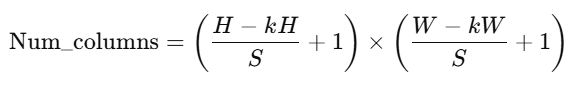

This represents the number of positions the kernel can take across the image, after considering stride and kernel size.


- **Question 2:**
What will be the number of rows in the im2col matrix?

  **Answer:**
The number of rows in the im2col matrix corresponds to the number of elements in each patch, which is equal to the total number of elements in the kernel (since each patch corresponds to a flattened version of the kernel). Therefore, the number of rows in the im2col matrix is:

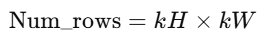


In [68]:
import numpy as np

def convolve_2d_im2col(image, kernel, stride=1, pad=0):

    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    out_height = (image_height + 2 * pad - kernel_height) // stride + 1
    out_width = (image_width + 2 * pad - kernel_width) // stride + 1

    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    
    image_cols = np.zeros((kernel_height * kernel_width, out_height * out_width))
    
    for y in range(out_height):
        for x in range(out_width):
            patch = padded_image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            image_cols[:, y*out_width + x] = patch.flatten()
    
    kernel_flat = kernel.flatten()
    
    output_flat = kernel_flat @ image_cols
    output = output_flat.reshape(out_height, out_width)
    
    return output

In [69]:
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

kernel = np.array([
    [1, 0],
    [0, -1]
])

stride = 1
pad = 1

print("Sanity Check: Comparing Results for 2D Convolution")

result_four_loops = convolve_2d_four_loops(image, kernel, stride=stride, pad=pad)
print("Four loops:\n", result_four_loops)

result_two_loops = convolve_2d_two_loops(image, kernel, stride=stride, pad=pad)
print("Two loops:\n", result_two_loops)

result_im2col = convolve_2d_im2col(image, kernel, stride=stride, pad=pad)
print("im2col method:\n", result_im2col)


if (np.allclose(result_four_loops, result_two_loops) and
    np.allclose(result_two_loops, result_im2col)):
    print("Sanity Check Passed: All methods produce similar results.")
else:
    print("Sanity Check Failed: The methods produce different results.")


Sanity Check: Comparing Results for 2D Convolution
Four loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Two loops:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
im2col method:
 [[ -1.  -2.  -3.  -4.   0.]
 [ -5.  -5.  -5.  -5.   4.]
 [ -9.  -5.  -5.  -5.   8.]
 [-13.  -5.  -5.  -5.  12.]
 [  0.  13.  14.  15.  16.]]
Sanity Check Passed: All methods produce similar results.


In [70]:
import numpy as np
import timeit

def benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, iterations):
    np.random.seed(42)
    random_image = np.random.rand(image_height, image_width)
    random_kernel = np.random.rand(kernel_height, kernel_width)

    time_four_loops = timeit.timeit(
        lambda: convolve_2d_four_loops(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations
    time_two_loops = timeit.timeit(
        lambda: convolve_2d_two_loops(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations
    time_im2col = timeit.timeit(
        lambda: convolve_2d_im2col(random_image, random_kernel, stride, pad), 
        number=iterations
    ) / iterations

    return (time_four_loops, time_two_loops, time_im2col)

num_iterations = 100

image_height = 50
image_width = 50
kernel_height = 4
kernel_width = 4
stride = 2
pad = 2
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")


Average times over 100 iterations (in seconds):
Four loops: 0.009397791000083089
Two loops: 0.005844530000176746
im2col: 0.0017432669998379425


### **Assignment Questions for 2D Convolution**

#### **1. Performance Comparison of 2D Convolution Methods**

After running the 2D convolution methods (four loops, two loops, and `im2col`), compare the average times. Which method was the fastest, and which was the slowest? Explain why this might be the case based on the underlying algorithm and memory usage of each method.

**Answer:**
The im2col method is the fastest because it transforms convolution into matrix multiplication, which is highly optimized. The four loops method is the slowest due to inefficient iteration and memory access. The two loops method is faster than four loops but not as efficient as im2col.

---

#### **2. Effect of Stride and Padding on Performance**

Try changing the values of `stride` and `pad`. How do these changes affect the performance of the different convolution methods? Which method shows the most significant performance change with varying stride and padding?

**Answer:**
im2col is the most efficient, with four loops being the most sensitive to changes in stride and padding. The two loops method lies in between, showing a moderate change. The four loops method shows the most significant performance degradation when increasing stride or padding, while im2col remains relatively stable.

In [71]:
num_iterations = 100

image_height = 50
image_width = 50
kernel_height = 4
kernel_width = 4
stride = 40
pad = 40
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")


Average times over 100 iterations (in seconds):
Four loops: 0.00020374199986690654
Two loops: 0.00017275999998673798
im2col: 8.197900024242699e-05


#### **3. Scaling with Image and Kernel Size**

Change the `image_height`, `image_width`, `kernel_height`, and `kernel_width` values (e.g., double both). How does the performance scale with the size of the image and kernel? Which method is most affected by these changes?

**Answer:**
When increasing the size of the image and kernel, im2col is the most scalable and efficient method, showing the least performance degradation. Four loops is the most sensitive to increases in size, while two loops performs better than four loops but is still significantly affected.


In [72]:
num_iterations = 100

image_height = 100
image_width = 100
kernel_height = 8
kernel_width = 8
stride = 2
pad = 2
avg_times = benchmark_2d_convolution(image_height, image_width, kernel_height, kernel_width, stride, pad, num_iterations)
print(f"\nAverage times over {num_iterations} iterations (in seconds):")
print(f"Four loops: {avg_times[0]}")
print(f"Two loops: {avg_times[1]}")
print(f"im2col: {avg_times[2]}")


Average times over 100 iterations (in seconds):
Four loops: 0.09715558500000043
Two loops: 0.023848421000002416
im2col: 0.006598973000072874


#### **4. When to Use `im2col` Method**

Based on your experiments, when would you prefer to use the `im2col` method over the other methods? Consider factors like image size, kernel size, stride, padding, and computational efficiency.

**Answer:**
The im2col method is best used when dealing with large images and kernels, as it converts the convolution operation into efficient matrix multiplication, making it highly suitable for environments with optimized hardware like GPUs. It offers significant performance advantages in tasks that require computational efficiency. However, for small images and kernels, the overhead of transforming the image into a matrix may make simpler methods like two loops or four loops faster.

---

#### **5. Interpretation of Results for Small Image and Kernel Sizes**

For smaller image and kernel sizes, performance differences may be less noticeable. Can you explain why some methods, such as `im2col`, might not always be the best choice when working with small inputs?

**Answer:**
For Small Images and Kernels: If the image and kernel sizes are small, the overhead of transforming the image into the im2col matrix may outweigh the benefits of optimized matrix multiplication. And also on devices with limited computational resources, im2col might not be the best option due to its higher memory and computational demands.


In [73]:
from skimage import io, color
from skimage.transform import resize
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, new_size=(325, 500)):
    image = io.imread(image_path)
    if len(image.shape) == 3:  
        image = color.rgb2gray(image)
    image = resize(image, new_size, mode='reflect')
    return image

def display_images(original, convolved_images, titles):
    num_convolutions = len(convolved_images)
    num_rows = (num_convolutions + 1) // 2  
    fig_width = 12
    fig_height = 6 + 3 * num_rows

    fig, axes = plt.subplots(num_rows + 1, 2, figsize=(fig_width, fig_height))

    axes = axes.flatten()

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image", fontsize=14)
    axes[0].axis('off')

    for i, (img, title) in enumerate(zip(convolved_images, titles), start=1):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title, fontsize=12)
        axes[i].axis('off')
        axes[i].spines['top'].set_color('blue')
        axes[i].spines['top'].set_linewidth(2)
        axes[i].spines['right'].set_color('blue')
        axes[i].spines['right'].set_linewidth(2)
        axes[i].spines['bottom'].set_color('blue')
        axes[i].spines['bottom'].set_linewidth(2)
        axes[i].spines['left'].set_color('blue')
        axes[i].spines['left'].set_linewidth(2)

    for ax in axes[len(convolved_images) + 1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

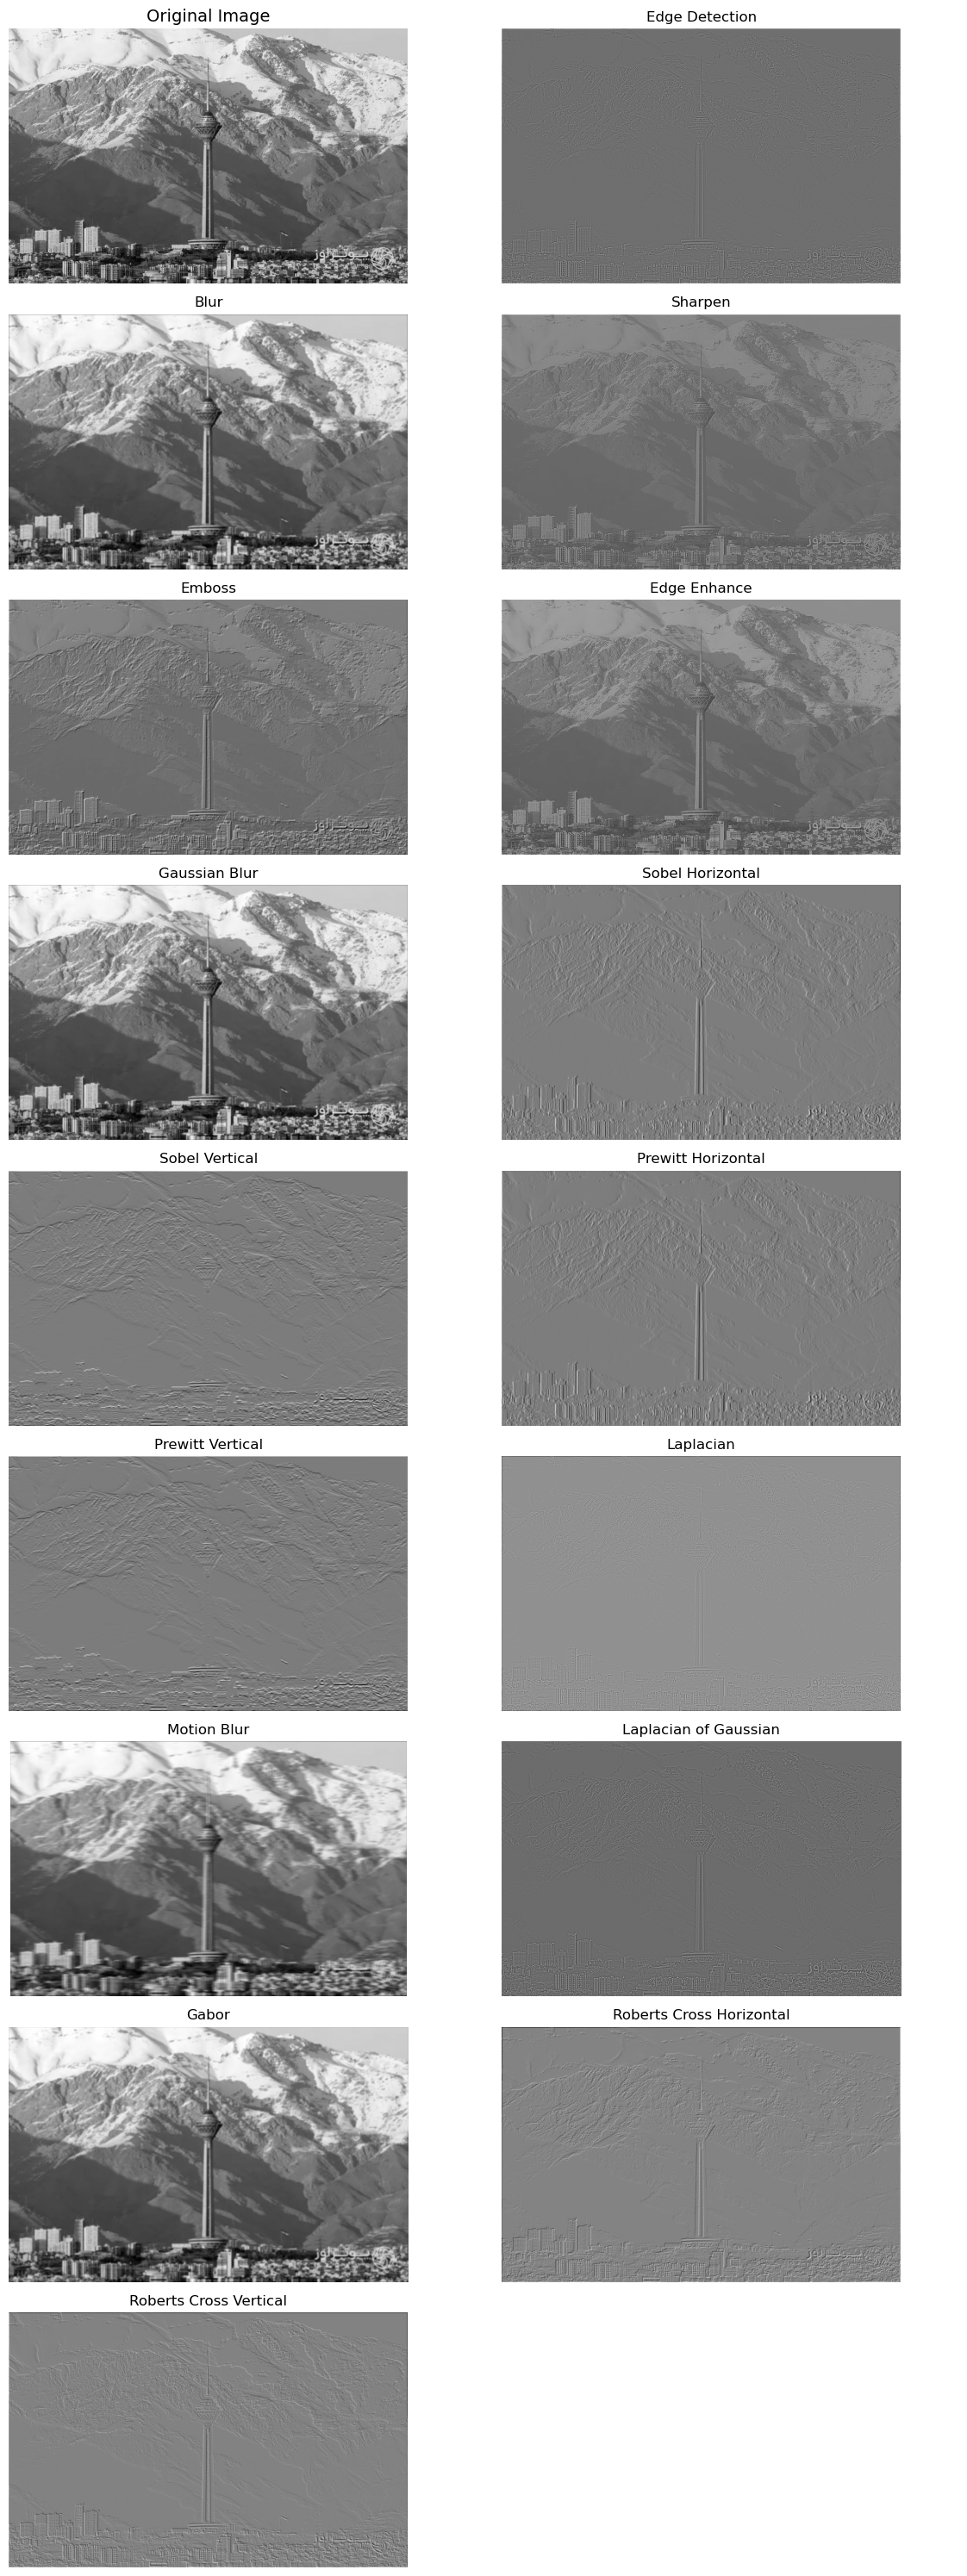

In [74]:
import matplotlib.pyplot as plt
import cv2

input_image = 'Milad.jpg'
image = cv2.imread(input_image , cv2.IMREAD_GRAYSCALE)


kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
}

convolved_images = []
titles = []

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1) 
    convolved_images.append(convolved_img)
    titles.append(title)

display_images(image, convolved_images, titles)

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="green" size="7" style="font-family:Arial, sans-serif;">
        Section #2<br>
    </font>
</div>


Import Library

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2
from skimage import io
import os
import random
import copy
from scipy.ndimage import convolve, gaussian_filter
from scipy.signal import convolve2d

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection A<br>
    </font>
</div>


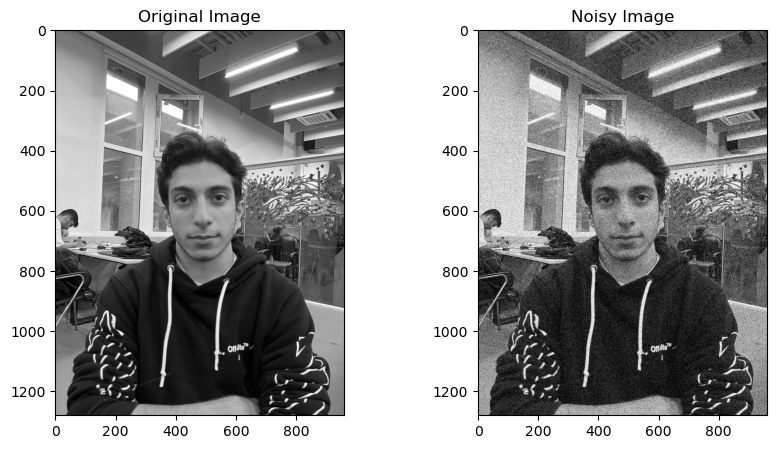

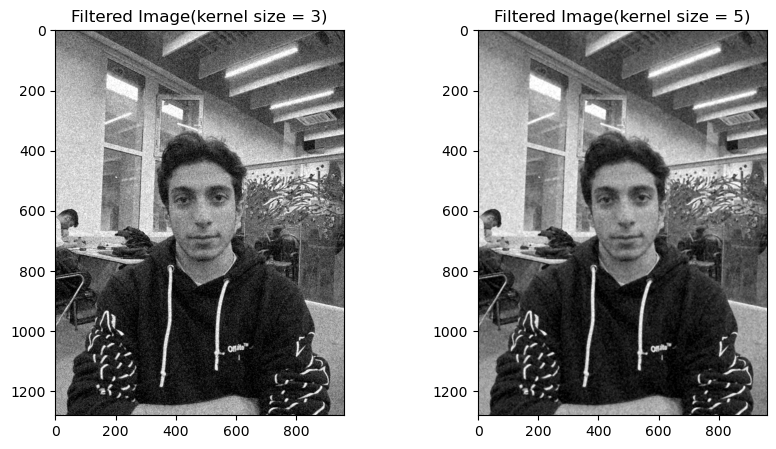

In [76]:
input_image = '1.jpg'
image = cv2.imread(input_image , cv2.IMREAD_GRAYSCALE)

def gaussian_noise_and_median_filter(image, file_path, mean, std):

    noise = np.random.normal(mean, std, image.shape)
    
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    
    filtered_image_k3 = cv2.medianBlur(noisy_image, 3)
    filtered_image_k5 = cv2.medianBlur(noisy_image, 5)
    
    cv2.imwrite(os.path.join(file_path, 'noisy_image.jpg'), noisy_image)
    cv2.imwrite(os.path.join(file_path, 'filtered_image_K3.jpg'), filtered_image_k3)
    cv2.imwrite(os.path.join(file_path, 'filtered_image_K5.jpg'), filtered_image_k5)
    
    return noisy_image , filtered_image_k3 , filtered_image_k5

mean = 0       
std = 40       
file_path = "output/Part_A"
noisy_image ,filtered_image_k3 ,filtered_image_k5 = gaussian_noise_and_median_filter(image, file_path, mean=mean, std=std)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap="gray")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Filtered Image(kernel size = 3)")
plt.imshow(filtered_image_k3, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Filtered Image(kernel size = 5)")
plt.imshow(filtered_image_k5, cmap="gray")

plt.show()

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection B<br>
    </font>
</div>


# Sobel filter

Sobel filter use two kernel to compute the gradient magnitude and direction of the image. The gradient indicates the strength and direction of edges.
Gradient refers to the rate of change in intensity (brightness or color) at each pixel in the image. In simpler terms, it measures how quickly the pixel values change from one point to another. When applied to edge detection, the gradient is used to identify areas where there is a significant change in pixel values, which usually corresponds to edges in the image.
The gradient magnitude is a measure of how much the intensity changes at a particular pixel and  The gradient direction indicates the orientation of the edge.

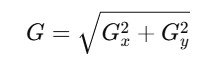                          
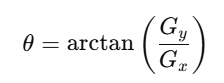


 
𝐺𝑥 is the gradient in the horizontal direction and 
𝐺𝑦 is the gradient in the vertical direction. 

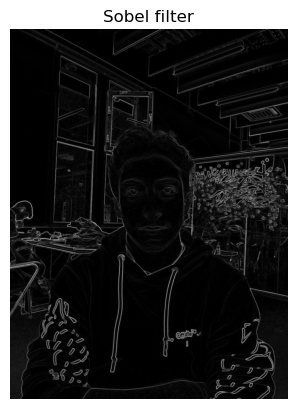

In [98]:
input_image = '1.jpg'
image = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)

Gx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Gy = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])

image = image.astype(np.float64)
horizontal_image = convolve(image, Gx, mode='reflect')
vertical_image = convolve(image, Gy, mode='reflect')

sobel_magnitude = np.sqrt(horizontal_image**2 + vertical_image**2)

sobel_magnitude = (sobel_magnitude / sobel_magnitude.max()) * 255
sobel_magnitude = sobel_magnitude.astype(np.uint8)

file_path = "output/Part_B"
cv2.imwrite(os.path.join(file_path, 'Sobel_filter.jpg'), sobel_magnitude)


plt.imshow(sobel_magnitude, cmap="gray")
plt.title("Sobel filter")
plt.axis("off")
plt.show()

## using cv2

In [83]:
'''
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  
sobel_magnitude_cv2 = np.sqrt(sobel_x**2 + sobel_y**2)

plt.imshow(sobel_magnitude_cv2, cmap="gray")
plt.title("Sobel filter using cv2")
plt.axis("off")
plt.show()
'''

'\nsobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  \nsobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  \nsobel_magnitude_cv2 = np.sqrt(sobel_x**2 + sobel_y**2)\n\nplt.imshow(sobel_magnitude_cv2, cmap="gray")\nplt.title("Sobel filter using cv2")\nplt.axis("off")\nplt.show()\n'

## Canny Filter
Canny filter is one the edge detection filter that use a series of algorithms to reach the goal
1. Gaussian filter : This filter blur the image by 5*5 kernel that make the image smooth.
2. Sobel filter : As we see in the last part, Sobel filter use two kernel to compute the gradient magnitude and direction of the image. The gradient indicates the strength and direction of edges.
3. Non-Maximum Suppression : This step refines the detected edges and keeps only the pixels that are local maxima in the gradient direction. This process results in thinner and sharper edges. For each pixel, the algorithm checks if the gradient magnitude is greater than its neighbors in the gradient direction.
4. Double Thresholding : Using two thresholds, pixels with gradient magnitudes higher than the upper threshold are classified as strong edges. Pixels with gradient magnitudes between the lower and upper thresholds are classified as weak edges. Pixels with values lower than the lower threshold are set to zero because they are unlikely to represent true edges.
5. Edge Tracking by Hysteresis : The final step ensures the continuity of edges by connecting weak edges to strong edges if they are near each other. Weak edges that are not connected to strong edges are discarded.

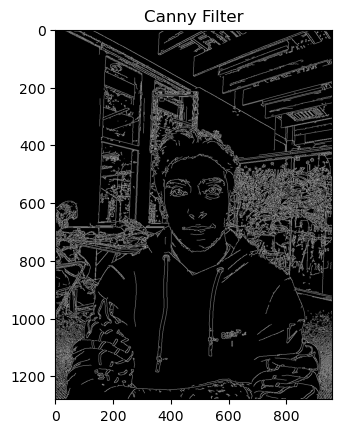

In [99]:
input_image = '1.jpg'
image = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)

low_threshold = 50
high_threshold = 100

Canny_image = cv2.Canny(image, low_threshold, high_threshold)

file_path = "output/Part_B"
cv2.imwrite(os.path.join(file_path, 'Canny_filter.jpg'), Canny_image)

plt.title("Canny Filter")
plt.imshow(edges, cmap='gray')
plt.show()


<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection C<br>
    </font>
</div>


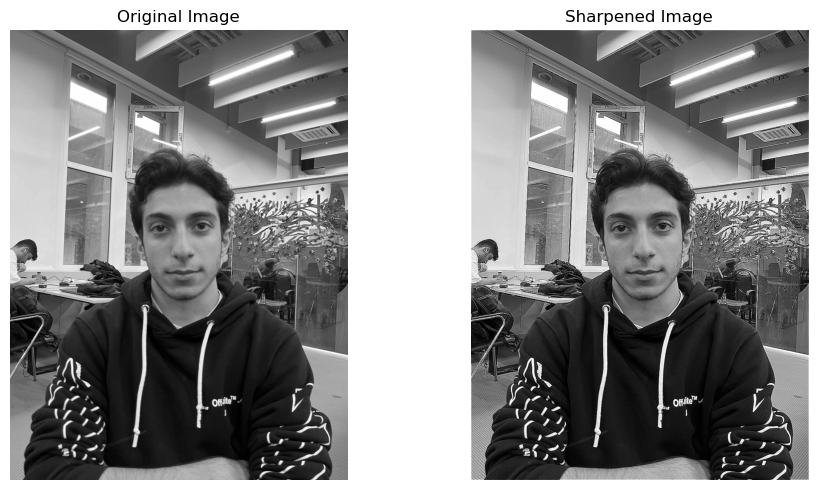

In [100]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_image = convolve2d(image, kernel_sharpen, mode='same', boundary='fill', fillvalue=0)

sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

file_path = "output/Part_C"
cv2.imwrite(os.path.join(file_path, 'sharpened_image.jpg'), sharpened_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection D<br>
    </font>
</div>


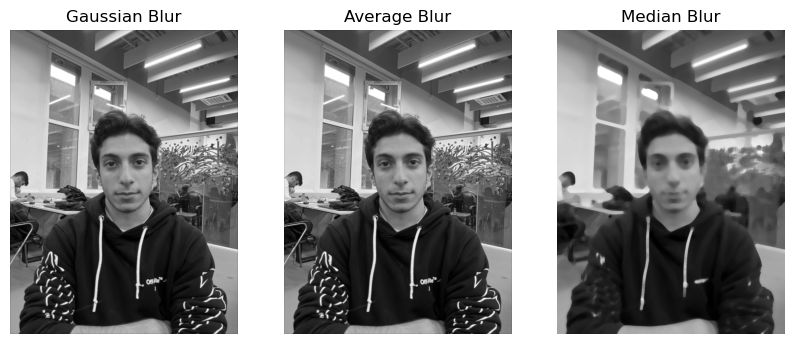

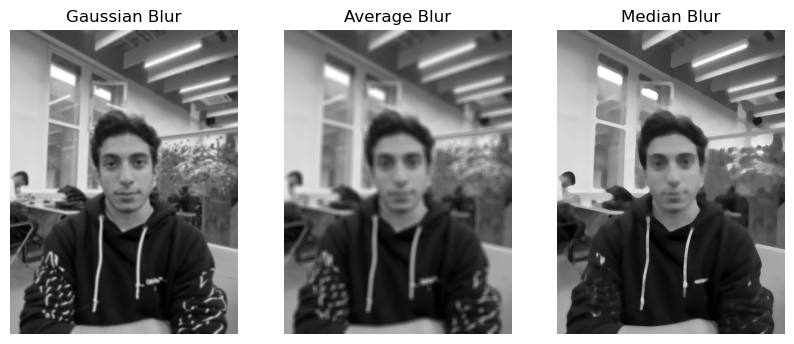

In [106]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

input_image = '1.jpg'
image = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)


blur_kernel = np.ones((3, 3)) / 9  
gaussian_kernel = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])  

gaussian_blur = convolve_2d_two_loops(image, blur_kernel, stride=1, pad=1) 
average_blur = convolve_2d_two_loops(image, gaussian_kernel, stride=1, pad=1) 
median_blur = cv2.medianBlur(image, 21)


gaussian_blur_better = cv2.GaussianBlur(image, (21, 21), 0)
average_blur_better = cv2.blur(image, (21, 21))
median_blur_better = cv2.medianBlur(image, 21)

file_path = "output/Part_D"
cv2.imwrite(os.path.join(file_path, 'gaussian_blur.jpg'), gaussian_blur)
cv2.imwrite(os.path.join(file_path, 'average_blur.jpg'), average_blur)
cv2.imwrite(os.path.join(file_path, 'median_blur.jpg'), median_blur)
cv2.imwrite(os.path.join(file_path, 'gaussian_blur_better.jpg'), gaussian_blur_better)
cv2.imwrite(os.path.join(file_path, 'average_blur_better.jpg'), average_blur_better)
cv2.imwrite(os.path.join(file_path, 'median_blur_better.jpg'), median_blur_better)

plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(average_blur, cmap='gray')
plt.title("Average Blur")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(median_blur, cmap='gray')
plt.title("Median Blur")
plt.axis("off")

plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(gaussian_blur_better, cmap='gray')
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(average_blur_better, cmap='gray')
plt.title("Average Blur")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(median_blur_better, cmap='gray')
plt.title("Median Blur")
plt.axis("off")

plt.show()


The differences between Gaussian, Average, and Median blurring techniques become evident in how they affect image smoothness and edge preservation. 

Gaussian filter: It applies a weighted average to each pixel and its neighbors based on a Gaussian distribution. This makes it smoother and more natural for reducing noise.

Average Blur: It computes the average of all pixels in a neighborhood. This method may blur the image more heavily and lose fine details compared to Gaussian blur.

Median Blur: It takes the median of the pixels in the neighborhood. This is particularly effective in removing salt-and-pepper noise while keeping edges sharper.



<br>
<font>
<div dir="ltr" align="center">
    <br>
    <font color="Blue" size="6" style="font-family:Arial, sans-serif;">
        Subsection E<br>
    </font>
</div>


In [107]:
kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Blur": np.ones((3, 3)) / 9,
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "Edge Enhance": np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]),
    "Gaussian Blur": np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]),
    "Sobel Horizontal": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Vertical": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Laplacian": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),
    "Motion Blur": np.array([[1/9]*9] * 3),  
    "Laplacian of Gaussian": np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]]),
    "Gabor": np.array([[1, 4, 6, 4, 1], [4, 11, 16, 11, 4], [6, 16, 25, 16, 6], [4, 11, 16, 11, 4], [1, 4, 6, 4, 1]]),
    "Roberts Cross Horizontal": np.array([[1, 0], [0, -1]]),
    "Roberts Cross Vertical": np.array([[0, 1], [-1, 0]]),
}

convolved_images = []
titles = []
output_dir = "output/Part_E"

for title, kernel in kernels.items():
    convolved_img = convolve_2d_two_loops(image, kernel, stride=1, pad=1) 
    convolved_images.append(convolved_img)
    titles.append(title)
    filename = os.path.join(output_dir, f"{title.replace(' ', '_')}_convolved.png")
    cv2.imwrite(filename, convolved_img)  

    

Edge Detection: Highlights edges by subtracting surrounding pixel values from the center pixel, detecting high-contrast areas.

Blur: Applies an average blur by smoothing the image, reducing sharpness.

Sharpen: Enhances the edges by subtracting surrounding pixel values and multiplying the center pixel.

Emboss: Creates an embossed effect by emphasizing edges with a 3D-like shadowing effect.

Edge Enhance: Enhances edges by applying a weighted center pixel and surrounding negative values.

Gaussian Blur: Smoothens the image by averaging nearby pixel values with a Gaussian distribution to reduce noise.

Sobel Horizontal: Detects edges in the horizontal direction by calculating gradients.

Sobel Vertical: Detects edges in the vertical direction by calculating gradients.

Prewitt Horizontal: Similar to Sobel, detects horizontal edges but uses a different kernel for gradient calculation.

Prewitt Vertical: Similar to Sobel, detects vertical edges with a different gradient kernel.

Laplacian: Detects edges by computing the second derivative of the image, highlighting areas with rapid intensity change.

Motion Blur: Simulates motion blur by averaging pixels along a specific direction.

Laplacian of Gaussian: First applies Gaussian smoothing, then detects edges using the Laplacian operator, useful for edge detection with noise reduction.

Gabor: Extracts textures and patterns by applying a wavelet transform for edge and frequency analysis.

Roberts Cross Horizontal: Detects edges in the horizontal direction using a simple 2x2 gradient-based kernel.

Roberts Cross Vertical: Detects edges in the vertical direction using a simple 2x2 gradient-based kernel.